# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

DOUARRE Quentin, MARTHRIN-JOHN Lauric, 4ème IR SC

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [1]:
# IMPORTATION OF THE DATASET AND SOME LIBRARIES
import csv
import numpy as np
from matplotlib import pyplot as plt # for a good visualization of the trees

from utils import load_from_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn import svm
from sklearn import tree

# Importation du dataset
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [61]:
# Liste contenant 6 configurations pour la construction d'arbres
treesParameters = [
    #1er configuration
    {'splitter':'best','max_depth': 2,'min_samples_leaf': 20},  
    #2eme configuration
    {'splitter':'random','max_depth': 5,'min_samples_leaf': 40},
    #3eme configuration
    {'splitter':'best','max_depth': 5,'min_samples_leaf': 1},
    #4eme configuration
    {'splitter':'best','max_depth': 100,'min_samples_leaf': 1},
    #5eme configuration
    {'splitter':'random','max_depth': 100,'min_samples_leaf':80},
    #6eme configuration
    {'splitter':'best','max_depth': 100,'min_samples_leaf': 100},
]

Train a decision tree for each of the previous configurations on the full dataset

In [62]:
modelsTree = []
for j in range (len(treesParameters)) :
    parameters= treesParameters[j]
    
    #FITTING INPUTS AND OUTPUTS
    clf = tree.DecisionTreeClassifier(splitter=parameters['splitter'], max_depth =parameters['max_depth'], min_samples_leaf =parameters['min_samples_leaf'],random_state=1)
    clf.fit(train_examples, train_labels) #On entraine sur le dataset entier comme demandé
    
    #On teste avec le dataset de test
    modelsTree.append(clf)

Notre troisième et quatrième configurations semblent fournir les meilleurs résultats. 

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

Nous allons prendre des arbres qui ont les mêmes splitter et min_samples_leaf mais des max_depth différentes. Ainsi leurs topologies seront différentes. Nous choisissons ce paramètre car il va nous aider à mettre en évidence l'overfitting en fonction de sa valeur.

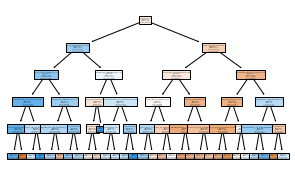

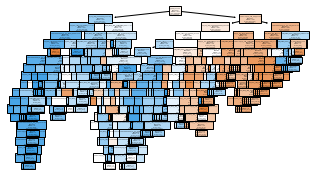

In [64]:
# Voici les deux arbres que nous allons étudier, ils ont des topologies différentes
plt.figure(figsize=(5,3)) 
tree.plot_tree(modelsTree[2], feature_names= (features), class_names= ("recidiviste", "non recidiviste"), filled=True)


plt.figure(figsize=(5,3)) 
tree.plot_tree(modelsTree[3], feature_names= (features), class_names= ("recidiviste", "non recidiviste"), filled=True)
plt.show()

Nous utilisons la fonction validation_curve() qui va nous retourner pour nos deux modèles ci-dessus, trainscore et testscore en faisant une 5-cross validation. Une fois que nous aurons les résultats, pour chaque modèle, nous ferons la moyenne.

In [65]:
# Tableau contenant le paramètre que nous allons faire varier, à savoir la profondeur maximale
max_depth_tested = [5,100]

# Evaluation des deux modèle avec 5-Cross validation
train_score, test_score = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=1), X=train_examples, y=train_labels,
                                       param_name = "max_depth",
                                       param_range = max_depth_tested,
                                        cv = 5,  # On fait une 5-cross validation
                                       scoring = "accuracy")

print("Premier modèle avec max_depth de 5 : trainscore: %4f  et  testscore: %4f" % (train_score[0].mean(),test_score[0].mean()))
print("Deuxième modèle avec max_depth de 100 : trainscore: %4f  et  testscore: %4f" % (train_score[1].mean(),test_score[1].mean()))

Premier modèle avec max_depth de 5 : trainscore: 0.678077  et  testscore: 0.658638
Deuxième modèle avec max_depth de 100 : trainscore: 0.696947  et  testscore: 0.646308


Propose an experimental study that shows the transition phase from underfitting to overfitting 

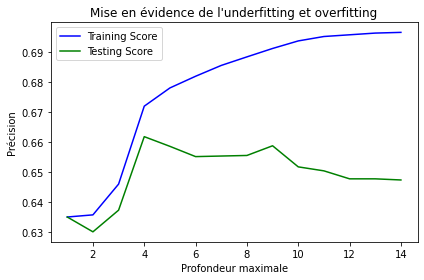

In [82]:
# Tableau contenant le paramètre que nous allons faire varier, à savoir la profondeur maximale
max_depth_tested_2 = range(1,15,1)

# 5-Cross validation
train_score, test_score = validation_curve(estimator=tree.DecisionTreeClassifier(random_state=1), X=train_examples, y=train_labels,
                                       param_name = "max_depth",
                                       param_range = max_depth_tested_2,
                                        cv = 5,  # On fait une 5-cross validation
                                       scoring = "accuracy")

# Calcul de la moyenne et de la déviation standard du train score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calcul de la moyenne et de la déviation standard du test score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Affichage de la moyenne des scores pour le train et test set
plt.plot(max_depth_tested_2, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(max_depth_tested_2, mean_test_score,
   label = "Testing Score", color = 'g')
 
# Affichage
plt.title("Mise en évidence de l'underfitting et overfitting")
plt.xlabel("Profondeur maximale")
plt.ylabel("Précision")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


On voit que pour une profondeur maximale très faible, de l'ordre de 1 ou 2, nous avons un train score et un test score pas très bon signe d'underfitting. 

Lorsque l'on arrive à une profondeur maximale de 4, nous avons la précision du test set la plus élevée avec les paramètres passés.

Une fois cette valeur de profondeur maximale passée, la précision du test set diminue signe d'un overfitting.

La meilleure configuration que nous avons donc juste avant l'overfitting est lorsque l'on prend une profondeur maximale de 4.

Remarque: Après avoir fait un GridSearchCV(), avec une autre combinaison nous pouvons gagner moins d'un pourcent en précision. Pour nous, le plus important était de mettre en avant notre démarche de sélection du meilleur modèle sans qu'il soit surentrainer.

Construct the confusion matrix on a particular good configuration (after explaining your choice)

Précision du modèle: 0.671090047393365
Matrice de confusion:


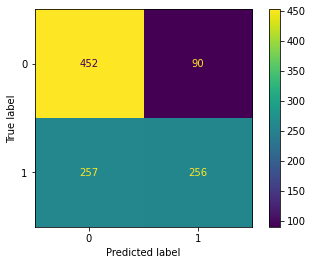

In [83]:
#80% du dataset est réservé pour l'entrainement et 20% pour les tests
# On fait se découpage car avant nous avons procédé à une 5-cross validation
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)

tree_selected = tree.DecisionTreeClassifier(max_depth=4,random_state=1) # cf notre réponse avant afin de savoir 
                                                         # pourquoi nous avons choisi cette combinaison
tree_selected.fit(X_train, y_train)
y_predict = tree_selected.predict(X_test)
print("Précision du modèle:",accuracy_score(y_test,y_predict))

#Matrice confusion
print("Matrice de confusion:")
cm = confusion_matrix(y_test,y_predict, labels=tree_selected.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_selected.classes_)

disp.plot()
plt.show()

Provide an evaluation of the fairness of the model based on the False Positive Rate

In [84]:
print("Pourcentage de personnes correctement prédites récédivites ou non par notre modèle:", (cm[0,0]+cm[1,1])/len(y_test)*100, "%")
print("Pourcentage de personnes récidivistes correctement prédites récédivistes par notre modèle:",cm[0,0]/(cm[0,0]+cm[1,0])*100,"%")
print("Pourcentage de personnes non récidivistes correctement prédites non récédivistes par notre modèle:",cm[1,1]/(cm[0,1]+cm[1,1])*100,"%")

Pourcentage de personnes correctement prédites récédivites ou non par notre modèle: 67.1090047393365 %
Pourcentage de personnes récidivistes correctement prédites récédivistes par notre modèle: 63.75176304654443 %
Pourcentage de personnes non récidivistes correctement prédites non récédivistes par notre modèle: 73.98843930635837 %


Nous pouvons voir que notre modèle a une précision de 67.10% ce qui est assez moyen. Ce qui est intéressant est de voir que notre modèle n'est pas équitable car il prédit avec des précisions plus faibles les positifs (63,75%) comparativement aux négatifs.(73.98%). Un autre découpage du dataset en training et testing set donne des résultats différents plutôt équitables cf ci-dessous.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.25)
tree_selected = tree.DecisionTreeClassifier(max_depth=4,random_state=1) 
tree_selected.fit(X_train, y_train)
y_predict = tree_selected.predict(X_test)
print("Précision du modèle:",accuracy_score(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict, labels=tree_selected.classes_)
print("Pourcentage de personnes correctement prédites récédivites ou non par notre modèle:", (cm[0,0]+cm[1,1])/len(y_test)*100, "%")
print("Pourcentage de personnes récidivistes correctement prédites récédivistes par notre modèle:",cm[0,0]/(cm[0,0]+cm[1,0])*100,"%")
print("Pourcentage de personnes non récidivistes correctement prédites non récédivistes par notre modèle:",cm[1,1]/(cm[0,1]+cm[1,1])*100,"%")

Précision du modèle: 0.6724791508718726
Pourcentage de personnes correctement prédites récédivites ou non par notre modèle: 67.24791508718727 %
Pourcentage de personnes récidivistes correctement prédites récédivistes par notre modèle: 66.79841897233202 %
Pourcentage de personnes non récidivistes correctement prédites non récédivistes par notre modèle: 67.85714285714286 %
